# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The agent ran for multiple trials, each with about 120 steps. The smartcab didn't move from the initial state in each trial. Since the smartcab didn't move, it was a prefered behaviour when the traffic signal is red, and therefore the agent received positive reward in the range of (0.5 to 2.0), however, on the green light with no oncoming traffic, it received the huge penalty for not moving (-4 to -6). Since the smartcab did not perform any action, it won't reach its destination and is considered to be unreliable.



### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

1. **3 Flags in the agent.py file:**
 - **learning** - We should set the learning to true for the learning agent. This flag would be used while choosing the action at each step. The LearningAgent.choose_action needs to be updated for the learning to happen.

 - **epsilon** - A very useful parameter to set the right trade off between the exploration and exploitation. The default value of 1.0 makes the agent to always take the random action without ever using the utility values (value function) that the agent is learning.

 - **enforce_deadline** - Needs to be set for the primary agent to respect the time deadline to reach to the destination. Failling to do so would mean the agent is unreliable.

2. The act method is called with the parameters action and the agent performing it. It checks if the action being performed is the valid action depedending on the agent's and environment state and assign the appropriate rewards.

3. The render() method implements all the GUI rendering capabilities using the PyGame environment. It displays the grid part of the window. render_text() method on the hand implements the text rendering part to complement the grid view. All the messages we see on top of the grid are being displayed through render_text().

4. next_waypoint() method considers the east-west direction before north-south direction, after confirming that the current location is not already the destination location.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


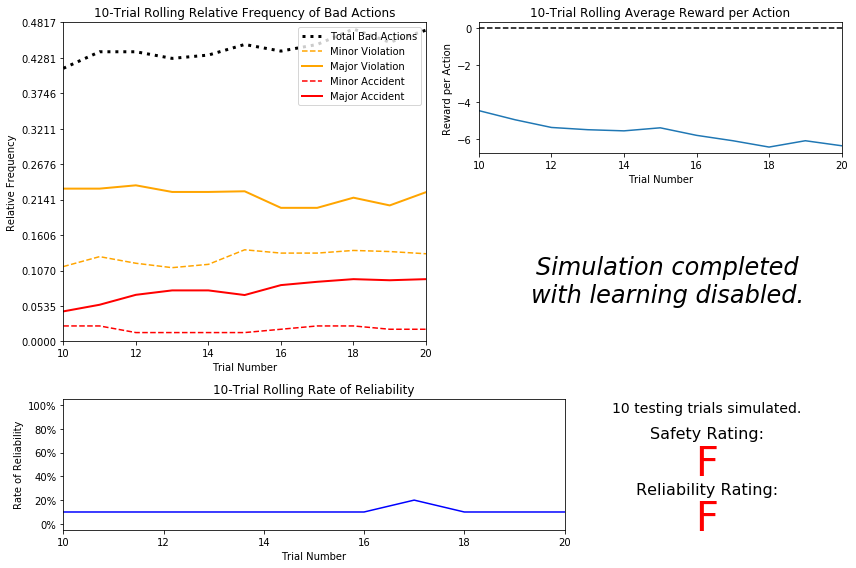

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

The agent is making bad decisions about 44-46% of the time. We also see about 6% and 2% of the decisions causing the major and minor accidents respectively. If we look at relatively, out of all the bad decisions, about 17% resulted in major or minor accident.

Also, we can see almost the linear increase in bad decisions w.r.t to trial number. Since at each trial we reset the complete state, it is difficult to comment on the causal relation. 

Since the peformance and rewards are directly proportional, the poor the agent performs, the lesser the reward, as can be seen from the second graph above. As the bad decisions increase with the trial number, the rewards decreases. We can also relate the highest bad decisions and lowest reward at the trial number 18.

Another obsevation we can make by relating graph 1 and 2 above, is the impact of major accident on the rewards. If we analyze the results for trial 15, we see that even though the total bad decisions made were higher than the previous trials, we secured better rewards in comparision. This could be because of the relatively less major accidents for the same trial. This suggests that the impact of major accidents on the rewards is much higher than the rest of the other bad actions.

As far the rate of reliability, since the all the actions taken are random, these numbers aren't very suprising. Considering reliability only make sense, if we follow the strategy to reach to our destination within the time. 

In summary, given the high rate of bad decisions resulting into siginificant major accidents this smartcab doesn't fit on the safer category. Similarly, with no right strategy to reach the destination, the smartcab cannot be considered reliable.


-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

All the features passed to the build_state are importnat for safety and reliability / efficiency, however, some of them are selected to build the agent state for the following reasons:

Sine the agent needs to reach the destination from its current position, it is necessay to follow the appropriate path at each step. Waypoint feature is in fact necessary to guide the agent to efficiently reach its destination.

It is also important that the agent reaches the destination within the finite allocated time, for it be to relaiable of its utility. Setting the deadline (along with appropriate rewards) is necessary for the agent to account for efficiency and reliability. However, this need not be state of the agent. We can reward the agent to reach the destination on time, enouraging the right behaviour.

In addition to reaching the destination within allotted time, it is very importnat that the journey to the destination is safe for the smartcab's adoption. Safety could be defined as taking the right action with minimal risks within the un-constrained environment. To be able to sense the environment, all the information given as the inputs paramter is therefore important for the following reasons:

1. light - To make sure that the agent doesn't move when it shouldn't, to avoid bumping into some other vehicles. 
2. left - Its important to know the vehicles on the left and its inteded direction. If the light is red, the agent shouldn't move forward or a left if the intended direction of the vehicle on the left is forward or left. So keep this as a state is important.
3. right - Right is not the important state to keep. If the light is red, the agent can only move in the right direction, and since the vehicles on the right doesn't come in the way, it is not important to keep this state.
4. oncoming - It is important for the agent to wait till there are no oncoming vahicles on the intersection to avoid the risk of having the collision.



### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

To determine the state space, it is important that we don't only look at the number of features but also the cardinality of each of the features.

    cardinality(waypoint) = 3       #['forward', 'left', 'right']
    cardinality(light) = 2          #[True, False] - True = NS open; False = EW open
    cardinality(left) = 4           #[None, 'forward', 'left', 'right']
    cardinality(oncoming) = 4       #[None, 'forward', 'left', 'right']
  
So, the total state space would be: 

    = card(waypoint) * card(light) * card(left) * card(oncoming)
    = 3 * 2 * 4 * 4
    = 96
    
This is not the very big state space. Given the enough training trials, we can make the agent learn the right actions to perform in each of the states.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

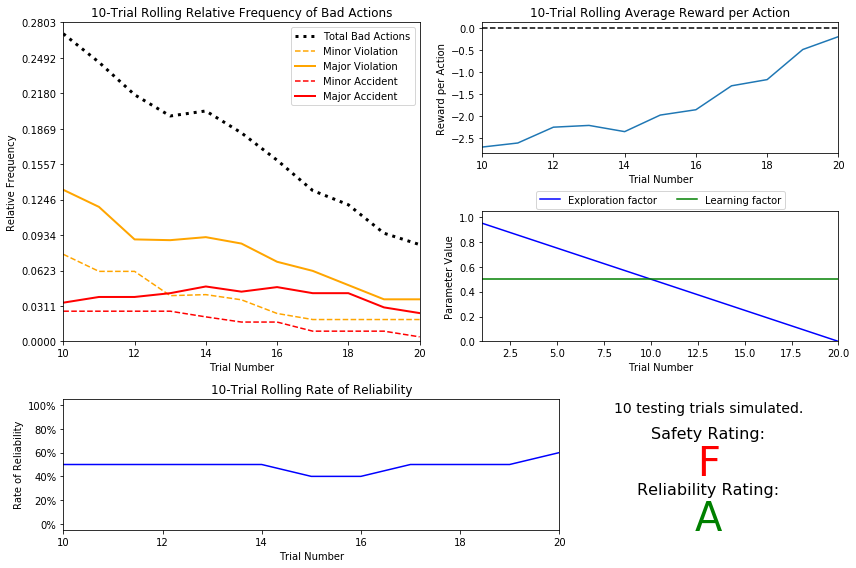

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

Between both the agents, we still see that the major and minor accidents remain with each trial, though less in comparison for the q-learning based agent. However, these accidents are the dominant factors for the agent's safety rating. 

The driving agent required 20 trials with the given epsilon and tolerance value. Ideally, it would be better to set epsilon and tolerance in such a way that allows agent to perform enough trials to learn the ideal actions for the entire state space.

The decaying function for ϵ is correctly represented in the parameters panel as a linearly decaying line.

Yes, as the number of trails increase, the bad decision rate decrease. I think this is the main difference between the basic and q-learning based agent. Here, we the agent is able to utilize what is has learned and use it to decide the appropriate action. As the bad decisions rate decrease, the reward increases. 

Having a non zero accidents would mean the agent is definitely not lending itself in the safety zone. This is refelected in the safety ratings accordingly. Reliability ratings are much better that the basic agent, this is expected since we are now able to use the Q-learning based value functions to decide on the next move.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

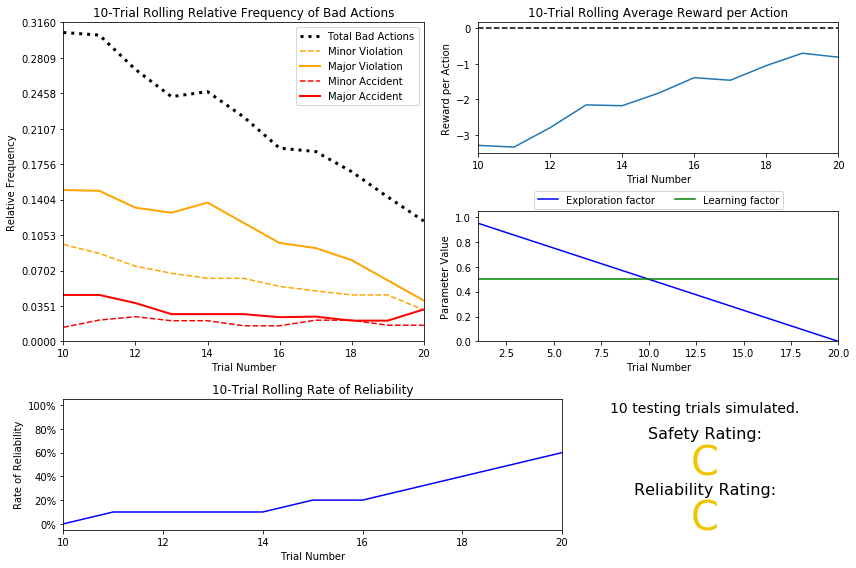

In [5]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### with episilon = 0.01 and  tolerance - 0.001

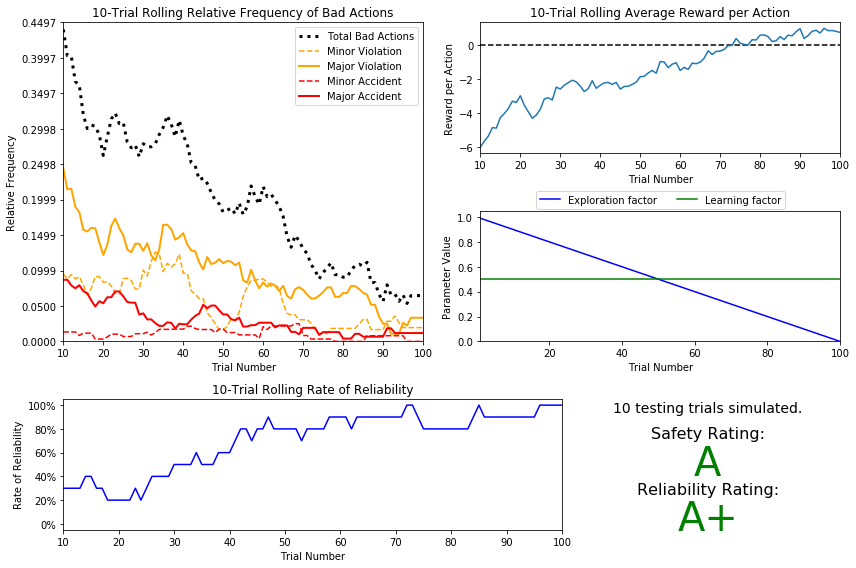

In [12]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### with episilon = 0.005 and tolerance - 0.005

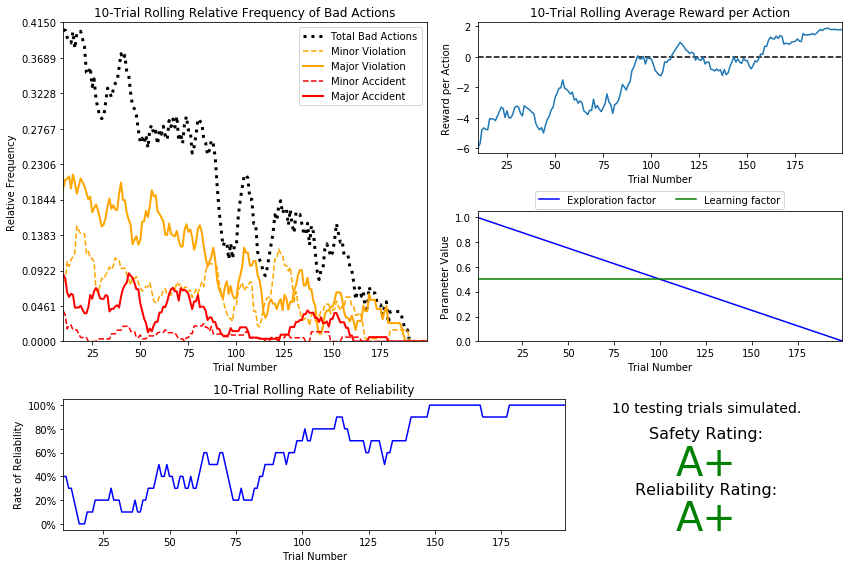

In [14]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### With epsilon = a ^ t , where a = 0.99

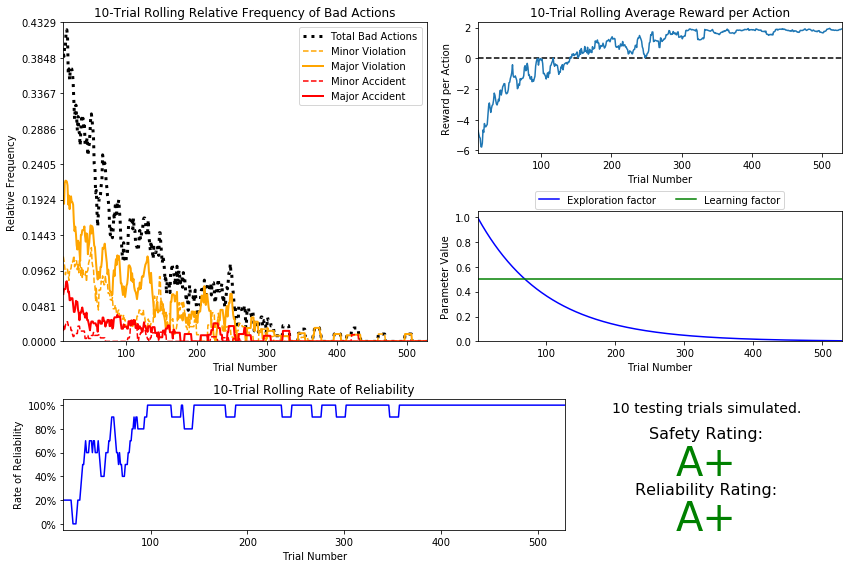

In [16]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### With epsilon = 1 / (t^2)

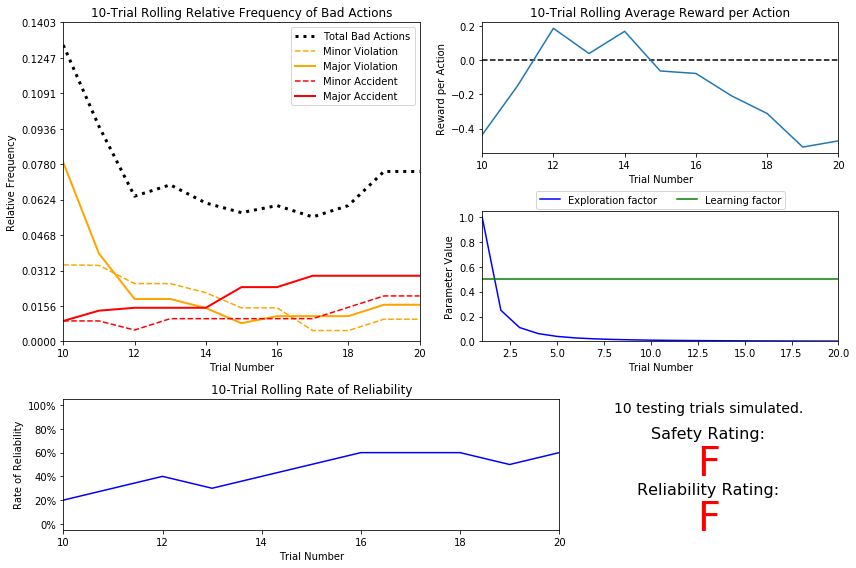

In [18]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### With epsilon = e ^ (-at) , a = 0.01

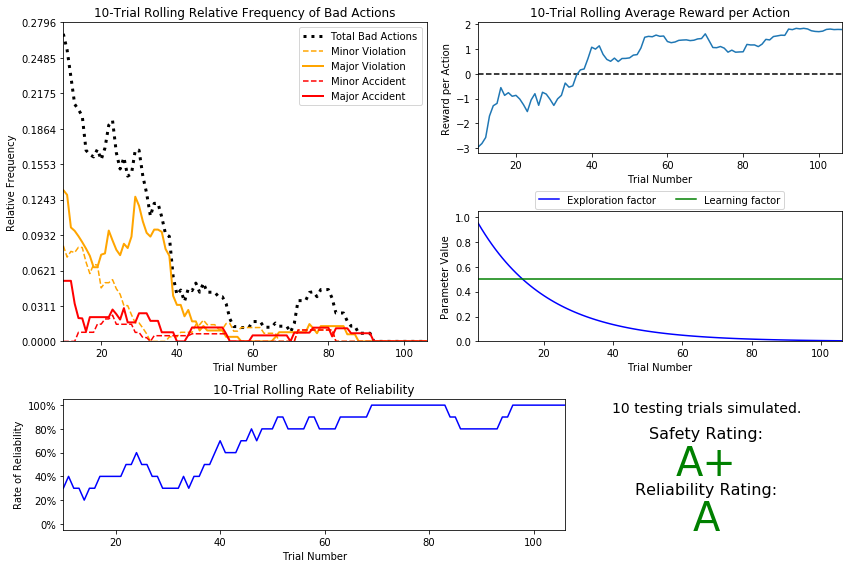

In [21]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### With epsilon = e ^ (-at) , a = 0.001

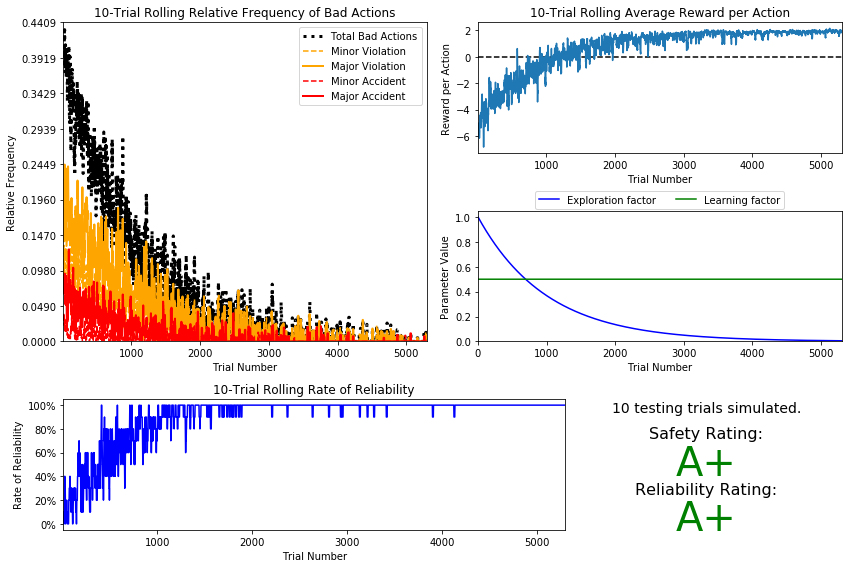

In [22]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### With epsilon = cos(min(90, at)), where a = 0.2

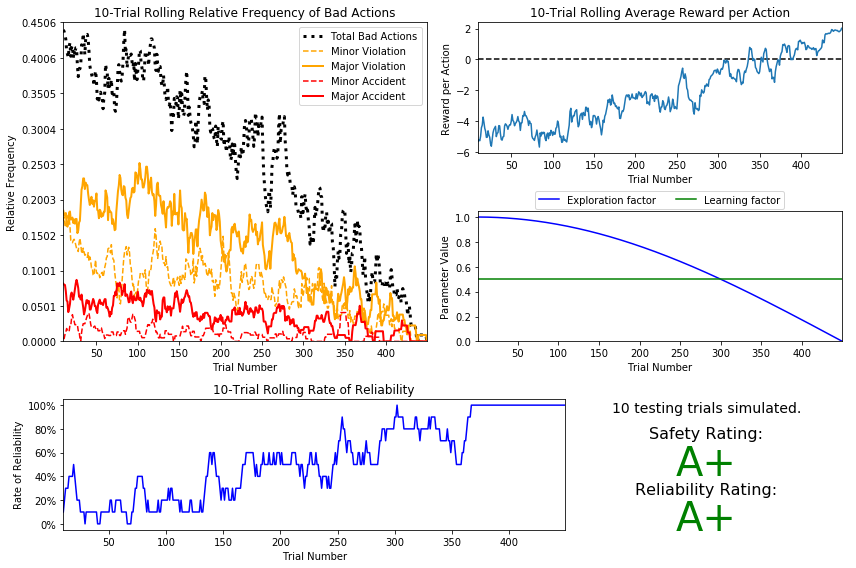

In [25]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

I considered many decay functions with different parameter values to understand their behaviour. Results for some of these functions are as show above. 

The trails required for the agent to learn depends on the parameter settings. From the results above, the agent would need about 100-200 trials to score good on safety and reliability. 

I didn't tune alpha (alpha = 0.5, tolerance = 0.005) during the experiments. However, while choosing the epsilon and tolerance, the key consideration was to choose the values such that agent is able to perform enough trials to explore the complete state space. If the epsilon is decaying too fast (like in 1/(t*t)), the agent will stop training with fewer trials resulting in under-learning. The priority is give for scoring good on safety and reliability than on the training time.

The improvement observed was huge. The default Q-learning agent didn't score good on the safety measure. With the rightly tuned q-learning parameters, the agent was able to score A+ for both safety and reliability. The bad decisions, including major and minor accidents, went to 0, and we were able to notice positive average rewards per action for the whole trail.

Yes, the results show that the driving agent has learned the appropriate policy. We see that the average reward per action to be close to 2 and o bad decisions.

Yes, the agent was able to score well on safey and reliability. However, this was a very simple view of the world. The real environment would be much more complex, with much higher state space and other constrains. Building the agent that can do well in the real world environment would be very challenging and satisfying at the same time.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

*** Optimal Policy: ***

If the light is green, check for any oncoming traffic, and follow the waypoint.
If the light is red, and the waypoint is right, follow the waypoint.
If the ligh is red, and the waypoing is forward or left, do nothing.

*** State Dictionary: ***

(waypoint, light, inputs->left, inputs->oncoming)

*** Optimal policy exmaples: ***

1. ('left', 'green', 'forward', None) -- forward : 0.42 -- right : 0.67 -- None : -5.46 **-- left : 1.27**
2. ('forward', 'green', 'left', 'left') **-- forward : 2.11** -- right : 1.00 -- None : -4.95 -- left : 0.63
3. ('right', 'red', None, None) -- forward : -18.46 **-- right : 1.50** -- None : 1.39 -- left : -10.06
4. ('forward', 'red', 'left', 'forward')  -- forward : -10.31 -- right : 0.79 **-- None : 1.62** -- left : -9.27 
 
*** Sub-optimal policy examples: ***

('forward', 'green', 'forward', 'right') -- forward : 0.00 -- right : 0.20 -- None : -4.71 **-- left : 0.81**

Most of the Q learning mappings represent the optimal action given the state information. However, there was one entry as share above which doesn't reflect the best action given the state information. The right action should have been to move forward. The reason why this could happen is if the agent didn't see this state many times during the training trials. As the epsilon value decreases, the agent starts to exploit than to explore better actions, and in which case, it may wrongly believe the sub-optimal action to be the best in the given state. Choosing the epsilon in such a way that it gives enough time for the agent to explore all the states many times would definitely help to deal with this problem.



-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

Future rewards should be used to estimate the long term reward for peforming an action in the given state. The underlying assumption here is that, not all the states are equal, meaning, there are some hidden states that can lead to very high positive or negative rewards, and we propagate this information backwards so that the agent can take the appropriate action to maximize the reqards. However, in our case, all states are equal. There is an equal chance of making a bad decision, or causing an accident at each state. So there isn't any hidden reward / penalty that we should back propagate for the agent to take tight action.

The smartcab also has the state information called waypoint which is used to guide the agent on the next action. In this way, the smartcab itself is sort of restricted on what actions it can take based on the waypoint, so future rewards doesn't help here. If the agent follow the waypoint, it receives the positive reward else the penalty, so there isn't the need for the agent to compute future reward, since the maximum reward could only be achieved by following the waypoint at each action.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.